# Mapping a Delay Information

In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
import os.path
# import urllib.request
import wget
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.formula.api as sm
# from pyspark.ml.feature import OneHotEncoder, StringIndexer
# from pyspark.ml.feature import VectorAssembler

In [2]:
pwd

'F:\\Dropbox\\Flight\\Code'

In [3]:
path = 'F:\\Dropbox\\Flight\\Data\\'

os.chdir(path)

### download the airportdata

In [4]:
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
if os.path.isfile('airports.dat') == False:
    airports= wget.download(url)
    print("file downloaded to code/airport.dat")
else:
    # if file exists
    print("Already have the file.")
    


Already have the file.


### Read the airport file 

In [5]:
df_aux = pd.read_csv('airports.dat', index_col=0,\
names = ['name', 'city', 'country','IATA','ICAO','lat','lng','alt','TZone','DST','Tz','aa','saa'], \
            header=0)
df_aux=df_aux.drop(['aa','saa'], axis=1)
df_aux= df_aux.loc[df_aux.country == 'United States']
df_aux.head()

,name,city,country,IATA,ICAO,lat,lng,alt,TZone,DST,Tz
3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9,A,America/Anchorage
3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9,A,America/Anchorage
3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9,A,America/Anchorage
3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10,N,Pacific/Honolulu
3416,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,113,-5,A,America/New_York


### Read the airport flight information.

In [15]:
df= pd.read_csv(path+'\\cleaned_data\\prepared_data.csv', parse_dates=['time','S_Dep_time','S_Arr_time'])
#parse data help the conversion string to datetime dtype.

C:\Users\Jukwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (80,84,86,88,90,92,94,96,98,104,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df['airport']= np.where(df['con']=='Dep', df['Origin'],df['Dest'])
print(df['airport'].head())
df['delay']=np.where(df['con']=='Dep', df['DepDelay'],df['ArrDelay'])

0    BOS
1    BOS
2    BOS
3    BOS
4    BOS
Name: airport, dtype: object


In [17]:
df_r= pd.merge(df, df_aux, left_on= 'Origin', right_on = 'IATA')

In [18]:
df_r.head(3)

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,...,city,country,IATA,ICAO,lat,lng,alt,TZone,DST,Tz
0,0,0,2014,4,10,21,2,2014-10-21,DL,19790,...,Boston,United States,BOS,KBOS,42.3643,-71.005203,20,-5,A,America/New_York
1,1,1,2014,4,10,21,2,2014-10-21,DL,19790,...,Boston,United States,BOS,KBOS,42.3643,-71.005203,20,-5,A,America/New_York
2,2,2,2014,4,10,21,2,2014-10-21,DL,19790,...,Boston,United States,BOS,KBOS,42.3643,-71.005203,20,-5,A,America/New_York


In [9]:
# list(df_r)

## Rearrange by airport

In [36]:

df_airport =df_r.groupby('Origin')['DepDelay','ArrDelay','delay','lat','lng'].agg('mean').reset_index()
print(df_airport.head())
a=df_r.groupby('Origin').size().reset_index(name ='counts')
print(a)
df_air= pd.merge(df_airport,a,on='Origin')
df_air

  Origin   DepDelay   ArrDelay      delay        lat         lng
0    ABQ   9.775947   7.279340   7.279340  35.040199 -106.609001
1    ACK  -0.608696  -8.652174  -8.652174  41.253101  -70.060204
2    ACY  21.950000  24.950000  24.950000  39.457600  -74.577202
3    ANC   2.407045  -5.663405  -5.663405  61.174400 -149.996002
4    ASE  20.092593  16.419401  16.419401  39.223202 -106.869003
    Origin  counts
0      ABQ    2267
1      ACK     115
2      ACY      20
3      ANC     512
4      ASE     765
5      ATL   13073
6      AUS    3471
7      BDL     140
8      BFL     265
9      BNA    2384
10     BOI     970
11     BOS  117001
12     BUF    1439
13     BUR   21095
14     BWI   10986
15     BZN     181
16     CAK     461
17     CHS     411
18     CLD    2497
19     CLE    1878
20     CLT    7218
21     CMH     651
22     COS     909
23     CVG     922
24     DAL    1275
25     DCA    9500
26     DEN   14661
27     DFW   14384
28     DTW    6549
29     EGE     103
..     ...     ...
76

,Origin,DepDelay,ArrDelay,delay,lat,lng,counts
0,ABQ,9.775947,7.279340,7.279340,35.040199,-106.609001,2267
1,ACK,-0.608696,-8.652174,-8.652174,41.253101,-70.060204,115
2,ACY,21.950000,24.950000,24.950000,39.457600,-74.577202,20
3,ANC,2.407045,-5.663405,-5.663405,61.174400,-149.996002,512
4,ASE,20.092593,16.419401,16.419401,39.223202,-106.869003,765
5,ATL,9.497381,-0.129871,-0.129871,33.636700,-84.428101,13073
6,AUS,10.026087,4.889373,4.889373,30.194500,-97.669899,3471
7,BDL,7.721429,-1.092857,-1.092857,41.938900,-72.683197,140
8,BFL,12.832700,14.254753,14.254753,35.433601,-119.056999,265
9,BNA,11.000845,4.367909,4.367909,36.124500,-86.678200,2384


In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def zscore(x):
    return (x-np.average(x))/np.std(x)

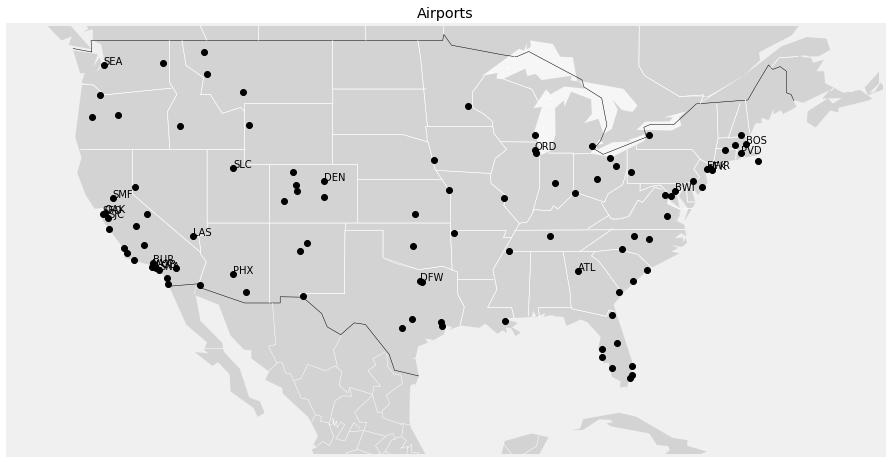

In [38]:

# For the map itself...
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')

# m.drawcoastlines()
m.drawcountries()
m.drawstates(color='white')
m.fillcontinents(color='#cccccc',lake_color='#FFFFFF', alpha=.8)
# m.drawmapboundary(fill_color='white')

lons= np.asarray(df_air['lng'])
lats= np.asarray(df_air['lat'])
x,y = m(lons,lats)
m.plot(x,y,'ko')
# draw parallels and meridians.

# m.drawparallels(np.arange(-90.,91.,30.))
# m.drawmeridians(np.arange(-180.,181.,60.))
df_text=df_air[(df_air['counts']>10000) &
                    (df_air['Origin'] != 'HNL')]
xt,yt = m(np.asarray(df_text['lng']), np.asarray(df_text['lat']))
txt=np.asarray(df_text['Origin'])
zp=zip(xt,yt,txt)
for row in zp:
    plt.text(row[0],row[1],row[2], fontsize=10, color='Black',)


plt.title("Airports")
plt.show()



Each marker is an airport.
Size of markers: Airport Traffic (larger means higher number of flights in year)
Color of markers: Average Flight Delay (Redder means longer delays)


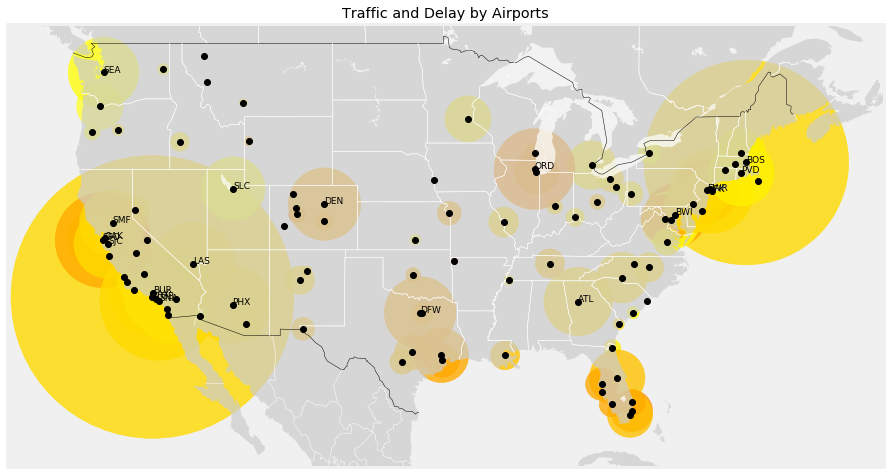

In [41]:
# For the map itself...
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# For the map itself...
# rcParms allows setting size of the figure
from pylab import rcParams
%matplotlib inline

# We set size of the figure
rcParams['figure.figsize'] = (14,10)

# Set parameters for plotting the map

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=-130,
                 llcrnrlat=22, #min longitude (llcrnrlon) and latitude (llcrnrlat)
                urcrnrlon=-60,
                 urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# Add features we want to show in the map...
my_map.drawcountries()
my_map.drawstates(color='white')
my_map.fillcontinents(color='#cccccc',lake_color='#FFFFFF', alpha=.7)
# my_map.shadedrelief()

# This line is to creat a colored map
colors = plt.get_cmap('hot')(np.linspace(0.0, 1.0, 30))
colors=np.flipud(colors)

# This set of instructions is used to genarate scatter plot in the map
countrange=max(df_air['counts'])-min(df_air['counts'])
# The following array normalizes the values in the 'delay' df_airports dataframe
# (assigns zscore to them) and determins its likelihood to be delayed by means
# of the sigmoid function.
al=np.array([sigmoid(x) for x in zscore(df_air['DepDelay'])])
xs,ys = my_map(np.asarray(df_air['lng']), np.asarray(df_air['lat']))
val=df_air['counts']*80000.0/countrange
my_map.plot(xs,ys,'ko')
my_map.scatter(xs, ys,  marker='o', s= val, alpha = .8,
               color=colors[(al*20).astype(int)])

# Set of instructions to add text
df_text=df_air[df_air['counts']>10000]
                  
xt,yt = my_map(np.asarray(df_text['lng']), np.asarray(df_text['lat']))
txt=np.asarray(df_text['Origin'])
zp=zip(xt,yt,txt)

for row in zp:
    plt.text(row[0],row[1],row[2], fontsize=9, color='Black')

print("Each marker is an airport.")
print("Size of markers: Airport Traffic (larger means higher number of flights in year)")
print("Color of markers: Average Flight Delay (Redder means longer delays)")
plt.title("Traffic and Delay by Airports")
plt.show()